In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

filename = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017.csv'
raw_data = pd.read_csv(filename)
raw_data.head()

/Users/mac/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


In [2]:
np.shape(raw_data)

(2343569, 34)

In [29]:
# Drop a few NA records
data = raw_data.dropna(subset = ['Hospital Service Area',
                             'APR Risk of Mortality'])

In [30]:
# Drop unkown gender (no distribution on black people)
data = data[data["Gender"]!="U"]
np.shape(data)

(2338151, 34)

In [31]:
# Drop patients from out of state
data = data[data["Zip Code - 3 digits"]!="OOS"]
np.shape(data)

(2271398, 34)

In [32]:
droplist = ["Discharge Year", # only 2017
            "Zip Code - 3 digits", # patients' code
            "Abortion Edit Indicator", # after dropping na, only one value, N for no abortion.
            "Operating Certificate Number", # assigned by NYS Department of Health
            "Permanent Facility Id", # almost 1-to-1 correspondence to "Facility Name",
            "CCS Diagnosis Code", # 1-to-1 correspondence to "CCS Diagnosis Description",
            "CCS Procedure Code", # 1-to-1 correspondence to "CCS Procedure Description",
            "APR MDC Code", # 1-to-1 correspondence to "APR MDC Description",
            "APR Severity of Illness Code", # 1-to-1 correspondence to "APR Severity of Illness Description",
            "APR DRG Code",# 1-to-1 correspondence to "APR DRG Description"
            "Payment Typology 1", # Don't care payment type in cost bias
            "Payment Typology 2",
            "Payment Typology 3",
            "Total Costs"]# Total estimated cost for the discharge, corr(charge,cost)~0.7
data = data.drop(droplist, axis=1)
print(np.shape(data))

(2271398, 20)


In [33]:
print(np.shape(data[data["Birth Weight"].notnull()]))
print(np.shape(data[data["CCS Diagnosis Description"]=="Liveborn"]))

(223087, 20)
(215327, 20)


In [34]:
test = data[data["Birth Weight"].notnull()]
set(test["Gender"])

{'F', 'M'}

In [35]:
test2 = data[data["CCS Diagnosis Description"]=="Liveborn"]
set(test2["Gender"])

{'F', 'M'}

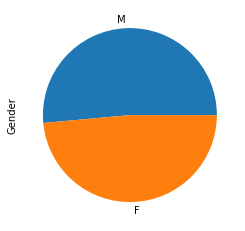

In [36]:
test["Gender"].value_counts().plot(kind="pie")

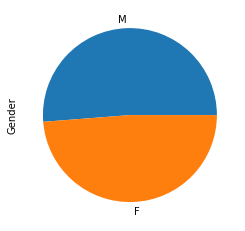

In [37]:
test2["Gender"].value_counts().plot(kind="pie")

In [38]:
len(test2[test2["Birth Weight"].isna()])

0

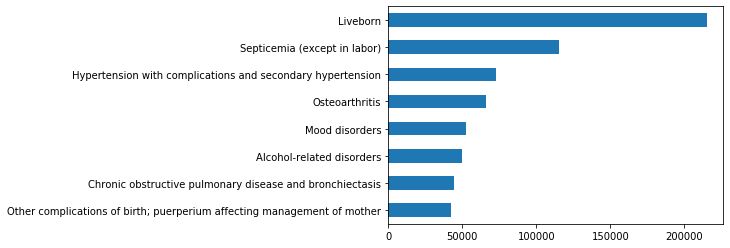

In [39]:
data["CCS Diagnosis Description"].value_counts()[::-1][-8:].plot.barh()

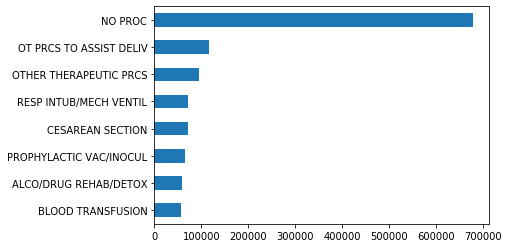

In [40]:
data["CCS Procedure Description"].value_counts()[::-1][-8:].plot.barh()

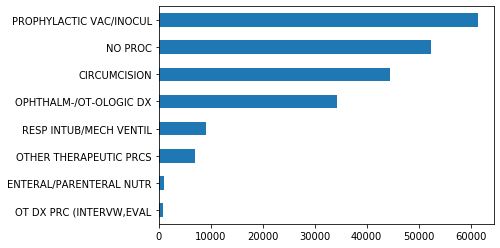

In [41]:
test2["CCS Procedure Description"].value_counts()[::-1][-8:].plot.barh()

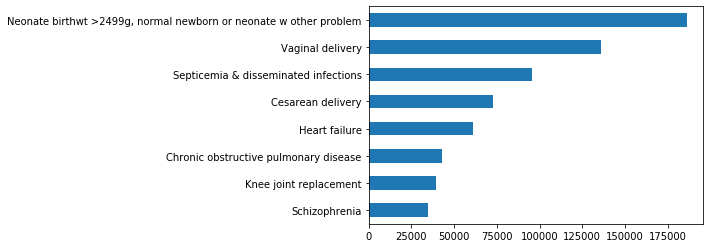

In [42]:
data["APR DRG Description"].value_counts()[::-1][-8:].plot.barh()

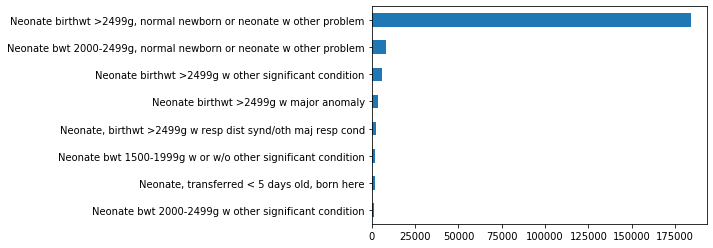

In [43]:
test2["APR DRG Description"].value_counts()[::-1][-8:].plot.barh()

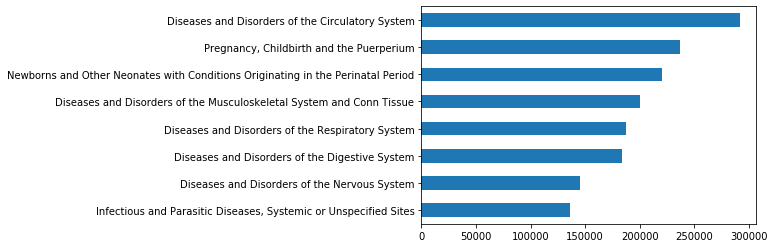

In [44]:
data["APR MDC Description"].value_counts()[::-1][-8:].plot.barh()

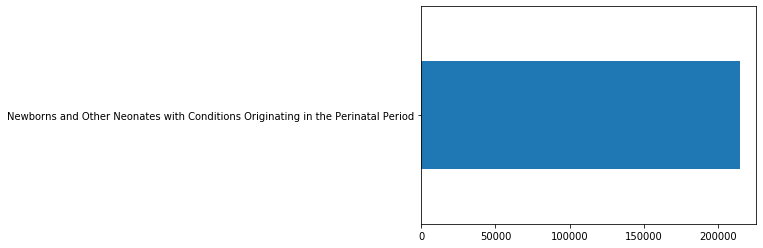

In [45]:
test2["APR MDC Description"].value_counts()[::-1][-8:].plot.barh()

In [46]:
test2.nunique()

Hospital Service Area                       8
Hospital County                            50
Facility Name                             125
Age Group                                   1
Gender                                      2
Race                                        4
Ethnicity                                   4
Length of Stay                            120
Type of Admission                           4
Patient Disposition                        18
CCS Diagnosis Description                   1
CCS Procedure Description                 126
APR DRG Description                        28
APR MDC Description                         1
APR Severity of Illness Description         4
APR Risk of Mortality                       4
APR Medical Surgical Description            2
Birth Weight                              127
Emergency Department Indicator              2
Total Charges                          116457
dtype: int64

In [47]:
droplist2 = ["CCS Diagnosis Description",
             "CCS Procedure Description",
             "Age Group",
             "APR DRG Description",
             "APR MDC Description"
            ]
test2 = test2.drop(droplist2, axis=1)
print(np.shape(test2))

(215327, 15)


In [48]:
test2.nunique()

Hospital Service Area                       8
Hospital County                            50
Facility Name                             125
Gender                                      2
Race                                        4
Ethnicity                                   4
Length of Stay                            120
Type of Admission                           4
Patient Disposition                        18
APR Severity of Illness Description         4
APR Risk of Mortality                       4
APR Medical Surgical Description            2
Birth Weight                              127
Emergency Department Indicator              2
Total Charges                          116457
dtype: int64

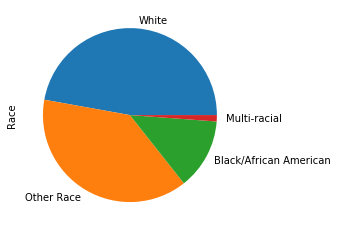

In [50]:
test2["Race"].value_counts().plot(kind="pie")

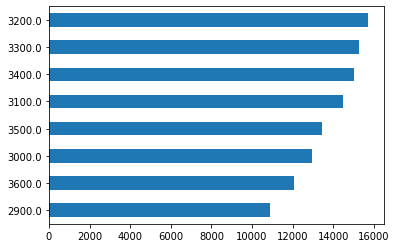

In [54]:
test2["Birth Weight"].value_counts()[::-1][-8:].plot.barh()

In [52]:
set(test2["Hospital Service Area"])

{'Capital/Adirond',
 'Central NY',
 'Finger Lakes',
 'Hudson Valley',
 'Long Island',
 'New York City',
 'Southern Tier',
 'Western NY'}

In [53]:
test2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Hospital Service Area,Hospital County,Facility Name,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Emergency Department Indicator,Total Charges
Hospital Service Area,1.000000,0.495469,0.190486,0.002076,0.213274,-0.041383,0.011755,-0.028432,0.054709,-0.014991,-0.002127,-0.006376,-0.054511,-0.003033,0.099982
Hospital County,0.495469,1.000000,0.470559,-0.000976,0.185273,0.077829,-0.023343,-0.041317,0.043245,-0.038319,-0.022945,-0.015992,-0.011630,-0.003673,0.140187
Facility Name,0.190486,0.470559,1.000000,0.003018,0.016420,-0.053648,-0.003227,-0.037993,0.010009,-0.028671,-0.009027,-0.008086,-0.031026,-0.006587,0.113058
Gender,0.002076,-0.000976,0.003018,1.000000,0.001189,-0.002032,-0.013827,0.000180,-0.005484,-0.024493,-0.017114,-0.008369,-0.015663,-0.000944,-0.048808
Race,0.213274,0.185273,0.016420,0.001189,1.000000,0.011018,-0.014198,0.005659,-0.033863,-0.037366,-0.020697,-0.000907,-0.041915,-0.004525,0.025571
Ethnicity,-0.041383,0.077829,-0.053648,-0.002032,0.011018,1.000000,-0.000625,-0.016642,0.017595,0.011764,0.003225,0.000338,-0.003277,0.001979,0.047864
Length of Stay,0.011755,-0.023343,-0.003227,-0.013827,-0.014198,-0.000625,1.000000,0.004012,0.228843,0.395901,0.426407,0.231546,0.086049,0.011479,0.094622
Type of Admission,-0.028432,-0.041317,-0.037993,0.000180,0.005659,-0.016642,0.004012,1.000000,-0.000504,-0.001649,0.000839,-0.000831,0.073777,0.169880,0.018976
Patient Disposition,0.054709,0.043245,0.010009,-0.005484,-0.033863,0.017595,0.228843,-0.000504,1.000000,0.217908,0.302983,0.133283,0.049997,0.011976,0.048183
APR Severity of Illness Description,-0.014991,-0.038319,-0.028671,-0.024493,-0.037366,0.011764,0.395901,-0.001649,0.217908,1.000000,0.448274,0.177029,0.067157,0.017340,0.138006


In [55]:
test2["APR Severity of Illness Description"]

20         Minor
55         Minor
59         Minor
73         Minor
81         Minor
           ...  
2343103    Minor
2343144    Major
2343311    Minor
2343321    Minor
2343374    Minor
Name: APR Severity of Illness Description, Length: 215327, dtype: object

In [58]:
test2.dtypes

Hospital Service Area                   object
Hospital County                         object
Facility Name                           object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
APR Severity of Illness Description     object
APR Risk of Mortality                   object
APR Medical Surgical Description        object
Birth Weight                            object
Emergency Department Indicator          object
Total Charges                          float64
dtype: object

In [60]:
np.shape(test2[test2["Birth Weight"]=="UNKN"])

(423, 15)

In [61]:
test2 = test2[test2["Birth Weight"]!="UNKN"]

In [63]:
test2["Birth Weight"] = test2["Birth Weight"].apply(pd.to_numeric)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
np.shape(test2[test2["Length of Stay"]=="120 +"])

(208, 15)

In [69]:
test2 = test2[test2["Length of Stay"]!="120 +"]

In [73]:
test2["Length of Stay"] = test2["Length of Stay"].apply(pd.to_numeric)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
test2.dtypes

Hospital Service Area                   object
Hospital County                         object
Facility Name                           object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
APR Severity of Illness Description     object
APR Risk of Mortality                   object
APR Medical Surgical Description        object
Birth Weight                           float64
Emergency Department Indicator          object
Total Charges                          float64
dtype: object

In [72]:
np.shape(test2)

(214696, 15)

# average the charge

In [80]:
avg = test2["Total Charges"]/test2["Length of Stay"]
test2["Average Charges"] = avg
test2.head()

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Hospital Service Area,Hospital County,Facility Name,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Emergency Department Indicator,Total Charges,Average Charges
20,Hudson Valley,Westchester,Montefiore New Rochelle Hospital,M,Other Race,Spanish/Hispanic,2,Newborn,Home or Self Care,Minor,Minor,Medical,3300.0,N,7247.00,3623.500000
55,Hudson Valley,Sullivan,Catskill Regional Medical Center,M,Black/African American,Spanish/Hispanic,3,Newborn,Home or Self Care,Minor,Minor,Medical,3100.0,N,7901.91,2633.970000
59,Hudson Valley,Sullivan,Catskill Regional Medical Center,M,White,Not Span/Hispanic,3,Newborn,Home or Self Care,Minor,Minor,Medical,3000.0,N,7013.82,2337.940000
73,Hudson Valley,Sullivan,Catskill Regional Medical Center,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,Minor,Minor,Medical,3300.0,N,4943.06,2471.530000
81,Hudson Valley,Sullivan,Catskill Regional Medical Center,M,White,Not Span/Hispanic,3,Newborn,Home or Self Care,Minor,Minor,Medical,3400.0,N,8220.07,2740.023333


In [83]:
test2.corr(method='pearson', min_periods=1)

,Length of Stay,Birth Weight,Total Charges,Average Charges
Length of Stay,1.000000,-0.437193,0.867343,0.298303
Birth Weight,-0.437193,1.000000,-0.366210,-0.218900
Total Charges,0.867343,-0.366210,1.000000,0.455786
Average Charges,0.298303,-0.218900,0.455786,1.000000


In [84]:
test2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Hospital Service Area,Hospital County,Facility Name,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Emergency Department Indicator,Total Charges,Average Charges
Hospital Service Area,1.000000,0.494291,0.194331,0.002228,0.212763,-0.041353,0.012051,-0.028600,0.056545,-0.015309,-0.001631,-0.005494,0.026658,-0.003100,0.101090,0.102064
Hospital County,0.494291,1.000000,0.474918,-0.000854,0.184728,0.078026,-0.023014,-0.041498,0.043412,-0.038515,-0.022349,-0.015472,0.028797,-0.003740,0.141165,0.141812
Facility Name,0.194331,0.474918,1.000000,0.002950,0.017786,-0.053902,-0.002846,-0.037942,0.012273,-0.028109,-0.008775,-0.007704,0.014320,-0.006529,0.112628,0.113816
Gender,0.002228,-0.000854,0.002950,1.000000,0.001564,-0.002236,-0.014064,0.000186,-0.006559,-0.024773,-0.017821,-0.007772,-0.046123,-0.000942,-0.048796,-0.047108
Race,0.212763,0.184728,0.017786,0.001564,1.000000,0.011300,-0.014034,0.005609,-0.031254,-0.037393,-0.020309,-0.000186,0.018111,-0.004561,0.026160,0.025425
Ethnicity,-0.041353,0.078026,-0.053902,-0.002236,0.011300,1.000000,-0.000381,-0.016651,0.015699,0.012195,0.004003,0.001388,0.008159,0.001983,0.047980,0.047812
Length of Stay,0.012051,-0.023014,-0.002846,-0.014064,-0.014034,-0.000381,1.000000,0.004195,0.222977,0.390223,0.419730,0.224907,0.200856,0.011655,0.094079,0.092217
Type of Admission,-0.028600,-0.041498,-0.037942,0.000186,0.005609,-0.016651,0.004195,1.000000,-0.000514,-0.001482,0.001261,-0.000500,-0.002388,0.169876,0.019075,0.019270
Patient Disposition,0.056545,0.043412,0.012273,-0.006559,-0.031254,0.015699,0.222977,-0.000514,1.000000,0.209416,0.290813,0.114516,0.092462,0.011605,0.047442,0.047083
APR Severity of Illness Description,-0.015309,-0.038515,-0.028109,-0.024773,-0.037393,0.012195,0.390223,-0.001482,0.209416,1.000000,0.437275,0.160385,0.147640,0.017574,0.137410,0.136612


In [85]:
test2 = test2.drop(["Length of Stay","Total Charges"], axis=1)
np.shape(test2)

(214696, 14)

In [87]:
test2.dtypes

Hospital Service Area                   object
Hospital County                         object
Facility Name                           object
Gender                                  object
Race                                    object
Ethnicity                               object
Type of Admission                       object
Patient Disposition                     object
APR Severity of Illness Description     object
APR Risk of Mortality                   object
APR Medical Surgical Description        object
Birth Weight                           float64
Emergency Department Indicator          object
Average Charges                        float64
dtype: object

In [89]:
newname = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017-Birth-Bias.csv'
test2.to_csv(newname, sep='\t', index=False)

In [79]:
test2["Total Charges"],test2["Length of Stay"]

(20           7247.00
 55           7901.91
 59           7013.82
 73           4943.06
 81           8220.07
              ...    
 2343103      6100.11
 2343144    243151.86
 2343311      5889.09
 2343321      4441.71
 2343374      6924.81
 Name: Total Charges, Length: 214696, dtype: float64, 20          2
 55          3
 59          3
 73          2
 81          3
            ..
 2343103     3
 2343144    29
 2343311     3
 2343321     2
 2343374     3
 Name: Length of Stay, Length: 214696, dtype: int64)

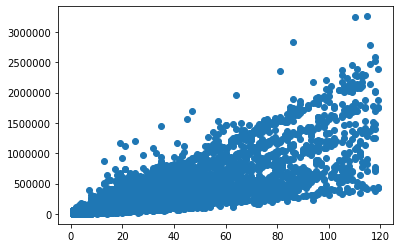

In [82]:
import matplotlib.pyplot as plt
plt.scatter(test2["Length of Stay"], test2["Total Charges"])

In [97]:
y = test2["Average Charges"]
X = test2.loc[:,["Birth Weight","Hospital County"]]
print(np.shape(y),np.shape(X))

(214696,) (214696, 2)


In [100]:
from sklearn.feature_selection import mutual_info_regression
from functools import partial
discrete_mutual_info_classif = partial(mutual_info_classif, iscrete_features=[1])
SelectKBest(score_func=discrete_mutual_info_classif).fit(X, y)
#mutual_info_regression(X,y,discrete_features=[1])

NameError: name 'mutual_info_classif' is not defined

In [105]:
for icol in test2.columns:
    print(test2[icol].value_counts()[::-1][-8:])#.plot.barh()

Southern Tier        2649
Finger Lakes        12485
Capital/Adirond     13490
Central NY          14715
Western NY          14771
Hudson Valley       21256
Long Island         26380
New York City      108950
Name: Hospital Service Area, dtype: int64
Monroe        9266
Erie         11246
Nassau       13056
Bronx        13256
Suffolk      13324
Queens       24361
Kings        26349
Manhattan    39449
Name: Hospital County, dtype: int64
NYU Winthrop Hospital                                             4736
New York Presbyterian Hospital - New York Weill Cornell Center    4842
New York - Presbyterian Brooklyn Methodist Hospital               4984
NYU Langone Hospitals                                             5308
Mount Sinai West                                                  5389
Mount Sinai Hospital                                              6981
Maimonides Medical Center                                         7839
Cohen Children's Medical Center                                  

KeyError: -8.0